# Part I - Exploring Ford GoBike System Data 
## by Nsikanabasi Essiet


## Investigation Overview

> The overall goal of this presentation is to get insights of trips busiest and least busiest days, busiest trip take-off and ending times and How does bike_id and member_birth_year relate with member_gender, user_type, and bike_share_for_all_trip

## Dataset Overview

> Ford GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in USA.
In the dataset, there are 183412 records of fordgobike trips and 16 specifications.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df_for_viz.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,trip_start_time,end_day,trip_end_time
0,52185.0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17:32:10.145000,Friday,08:01:55.975000
1,42521.0,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18:53:21.789000,Friday,06:42:03.056000
2,61854.0,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12:13:13.218000,Friday,05:24:08.146000
3,36490.0,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17:54:26.010000,Friday,04:02:36.842000
4,1585.0,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23:54:18.549000,Friday,00:20:44.074000


In [3]:
df.dtypes

duration_sec               float64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
start_day                   object
trip_start_time             object
end_day                     object
trip_end_time               object
dtype: object

In [4]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1:  Barchart)

> Most trips start day is Thursday with trip frequency of 35197, followed by Tuesday with frequency of 31813. Saturday has the least frequency of 15405.

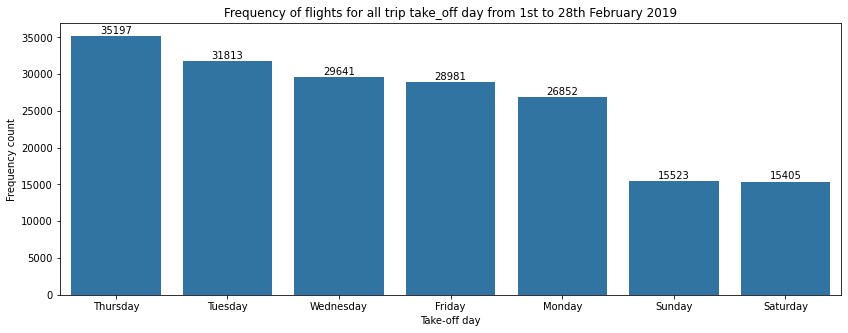

In [5]:
def start_day_bar():
    start_day_count = df.start_day.value_counts()
    end_day_count = df.end_day.value_counts()

    colour = sns.color_palette()[0]
    plt.figure(figsize=[14, 5])

    sns.barplot(x =start_day_count.index, y = start_day_count, color= colour);
    plt.xlabel('Take-off day')
    plt.ylabel('Frequency count')
    plt.title('Frequency of flights for all trip take_off day from 1st to 28th February 2019')

    for i in range(start_day_count.shape[0]):
        count = start_day_count[i]
        plt.text(i, count+1400, count, ha = 'center', va = 'top')
start_day_bar()

## (Visualization 2: Histogram)

> This is a log transformed histogram. It looks fairly symmetric with one prominent peak
The graph shows that around 600 seconds have the largest frequency of about 25000.
It seems most of the trips are below 1000 seconds duration.

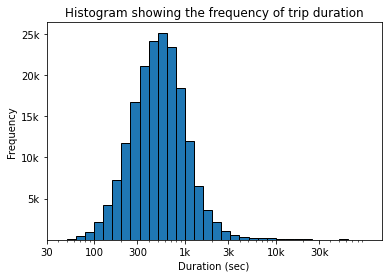

In [6]:
bins = 10**np.arange(1.7, 4.94+0.1, 0.1)

x_ticks = [30,100,300,1000,3000,10000,30000]
def trip_hist():
    x_label = ['30', '100', '300', '1k', '3k', '10k', '30k']
    y_ticks = [5000, 10000, 15000, 20000, 25000]
    y_labels = ['5k', '10k', '15k', '20k', '25k']
    plt.hist(df.duration_sec, bins = bins, edgecolor= 'black');
    plt.xscale('log')
    plt.xticks(x_ticks, x_label);
    plt.yticks(y_ticks, y_labels)
    plt.xlabel('Duration (sec)')
    plt.ylabel('Frequency')
    plt.title('Histogram showing the frequency of trip duration');
trip_hist()

## (Visualization 3: Histogram)

The two histograms below show the frequencies of trips take-off and ending times. With bin size of 24 for both plots so that each bin represents a unique hour, the graphs are bi-modal and look roughly the same with 17:00 as the hour with highest trip take-off and ending, and 03:00 with the least.

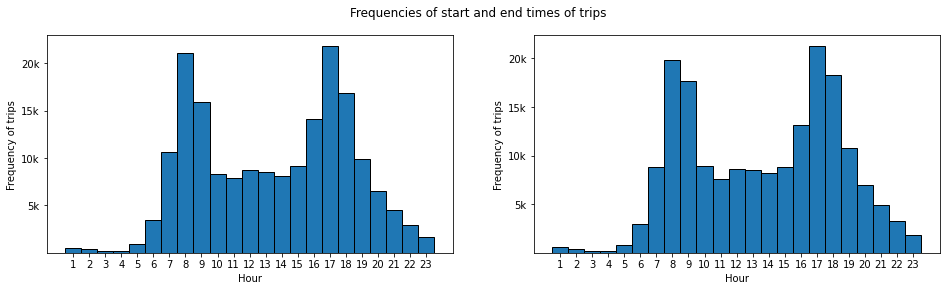

In [7]:
def trips_times_hist():
    plt.figure(figsize=[16, 4])

    plt.subplot(121)
    bins = np.arange(0.5,23.5+1, 1)
    ax = plt.hist(df.start_time.dt.hour, bins = bins, edgecolor = 'black');
    plt.xticks(np.arange(1,24, 1));
    y_ticks = [5000, 10000, 15000, 20000]
    y_labels = ['5k', '10k', '15k', '20k']
    plt.yticks(y_ticks, y_labels);
    plt.xlabel('Hour')
    plt.ylabel('Frequency of trips')

    plt.subplot(122)
    plt.hist(df.end_time.dt.hour, bins = bins, edgecolor = 'black');
    plt.xticks(np.arange(1,24, 1));
    y_ticks = [5000, 10000, 15000, 20000]
    y_labels = ['5k', '10k', '15k', '20k']
    plt.yticks(y_ticks, y_labels);
    plt.xlabel('Hour')
    plt.ylabel('Frequency of trips')
    plt.suptitle('Frequencies of start and end times of trips');
trips_times_hist()

In [8]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 